/tmp/ipykernel_3258275/3317066926.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


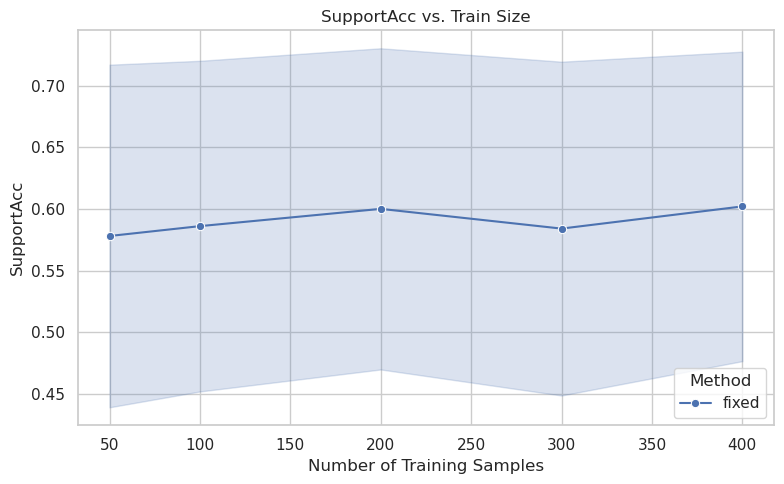

/tmp/ipykernel_3258275/3317066926.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


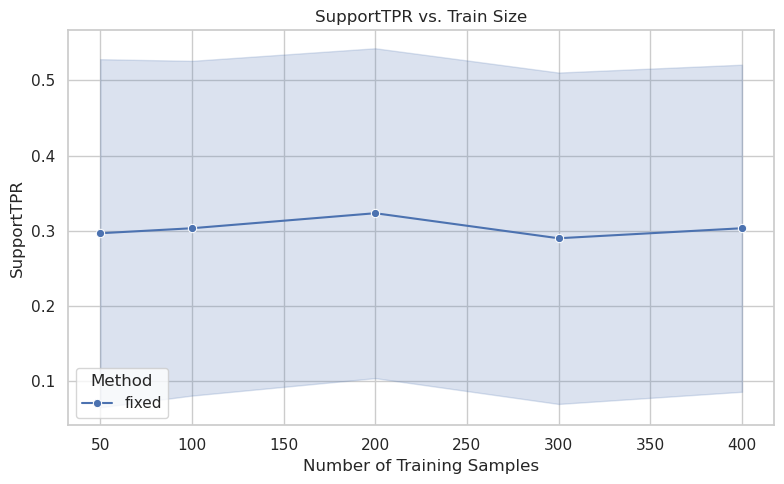

/tmp/ipykernel_3258275/3317066926.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


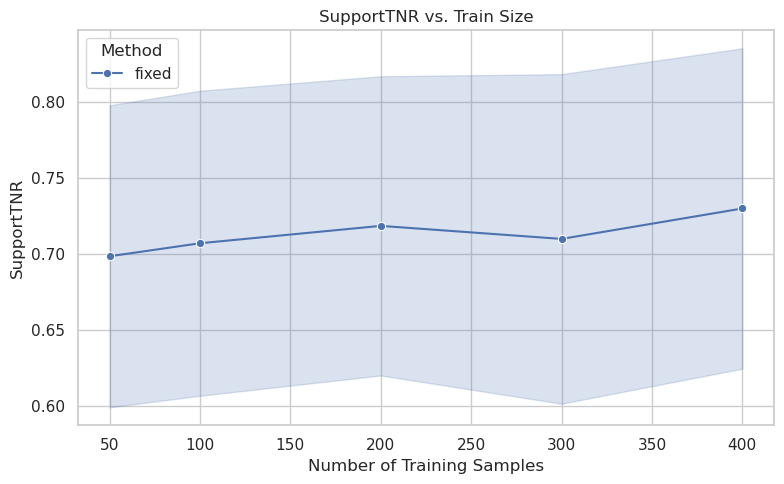

/tmp/ipykernel_3258275/3317066926.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


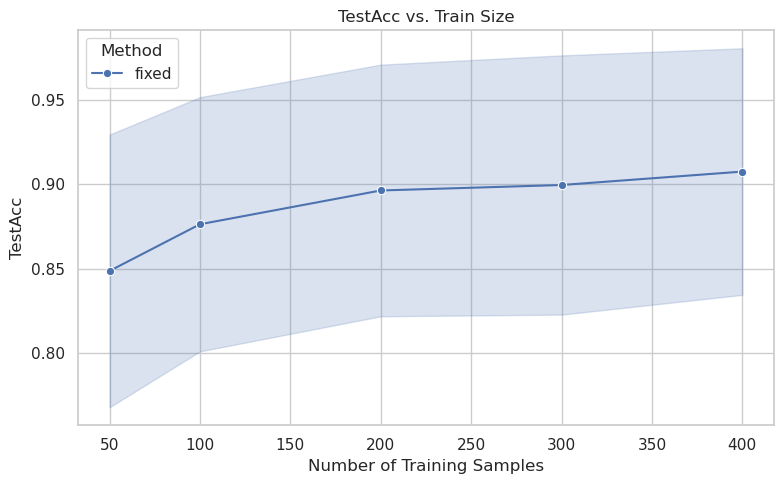

/tmp/ipykernel_3258275/3317066926.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


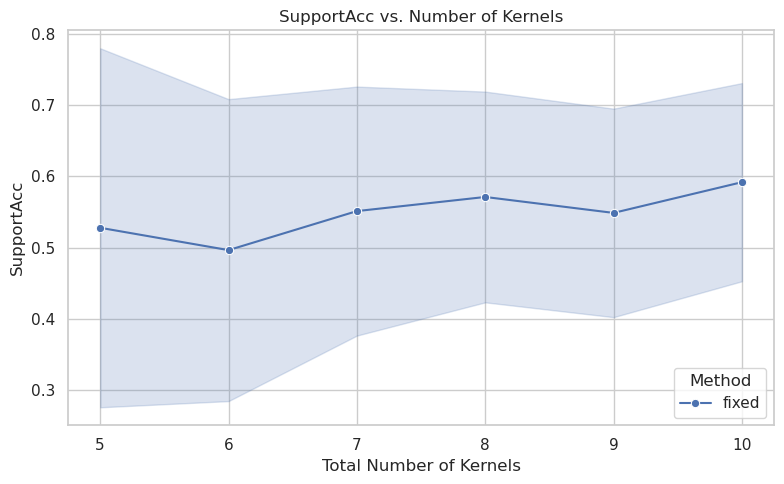

/tmp/ipykernel_3258275/3317066926.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


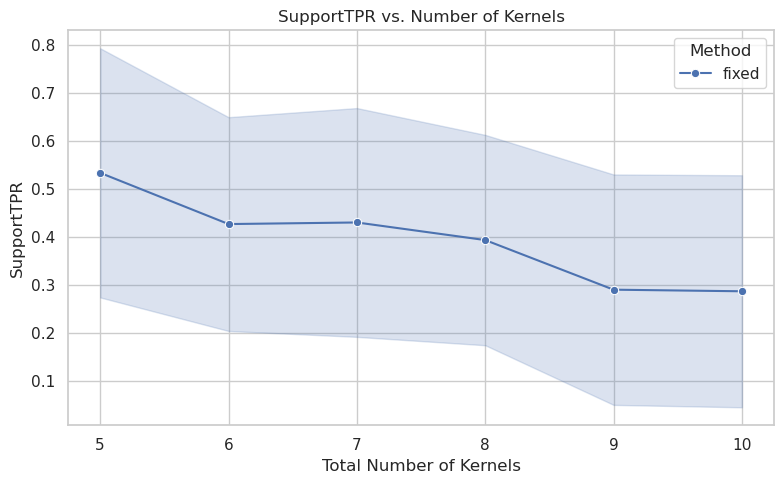

/tmp/ipykernel_3258275/3317066926.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


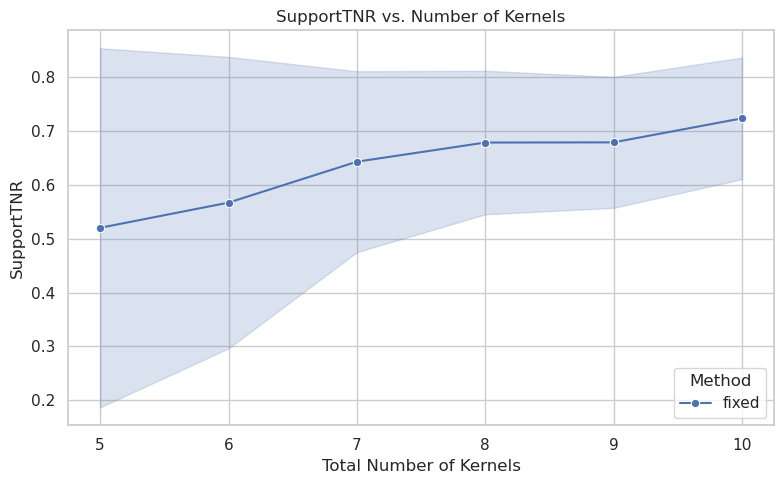

/tmp/ipykernel_3258275/3317066926.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


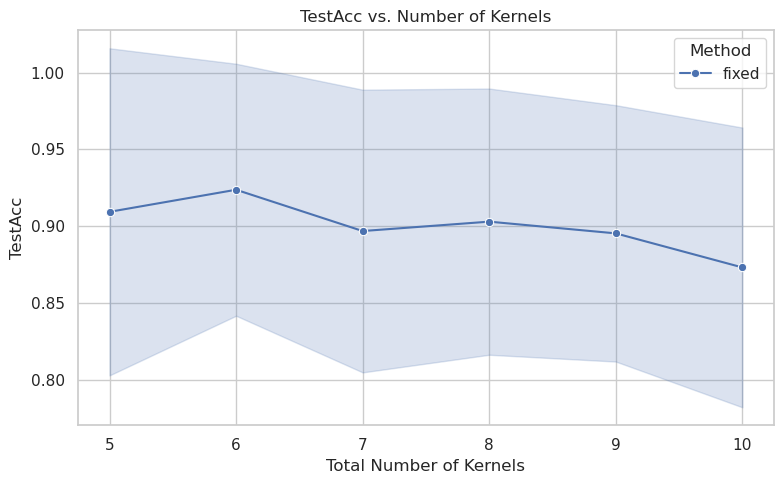

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the DataFrame
df = pd.read_csv("./scripts/run_synthetic_experiments_results_20253123_153132.csv")

# Ensure correct data types
df['TrainSize'] = df['TrainSize'].astype(int)
df['TotalKernels'] = df['TotalKernels'].astype(int)

# Separate the experiment types
df_vary_n = df[df['ExpType'] == 'vary_n']
df_vary_k = df[df['ExpType'] == 'vary_k']

# Set seaborn style
sns.set(style="whitegrid")

# === Plot 3: SupportAcc, TPR, TNR, TestAcc vs Train Size ===
metrics = ['SupportAcc', 'SupportTPR', 'SupportTNR', 'TestAcc']

for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.lineplot(
        data=df_vary_n,
        x='TrainSize',
        y=metric,
        hue='Method',
        estimator='mean',
        ci='sd',
        marker='o'
    )
    plt.title(f'{metric} vs. Train Size')
    plt.ylabel(metric)
    plt.xlabel('Number of Training Samples')
    plt.legend(title='Method')
    plt.tight_layout()
    plt.show()

# === Plot 4: SupportAcc, TPR, TNR, TestAcc vs Number of Kernels ===
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.lineplot(
        data=df_vary_k,
        x='TotalKernels',
        y=metric,
        hue='Method',
        estimator='mean',
        ci='sd',
        marker='o'
    )
    plt.title(f'{metric} vs. Number of Kernels')
    plt.ylabel(metric)
    plt.xlabel('Total Number of Kernels')
    plt.legend(title='Method')
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_3258275/4066840040.py:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


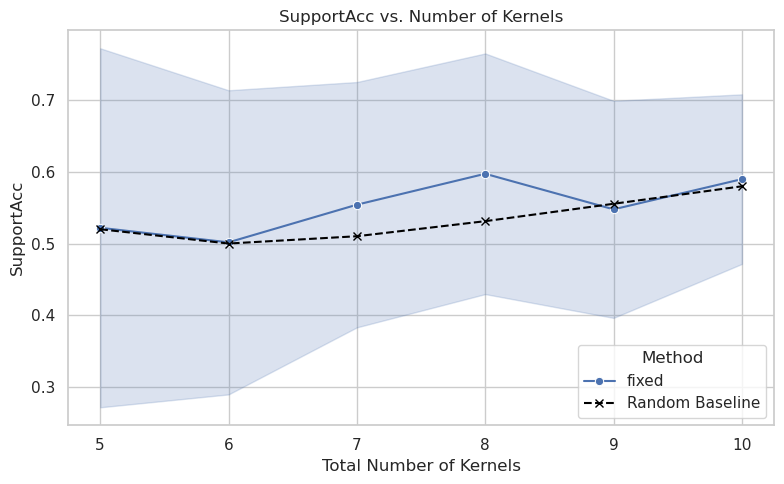

/tmp/ipykernel_3258275/4066840040.py:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


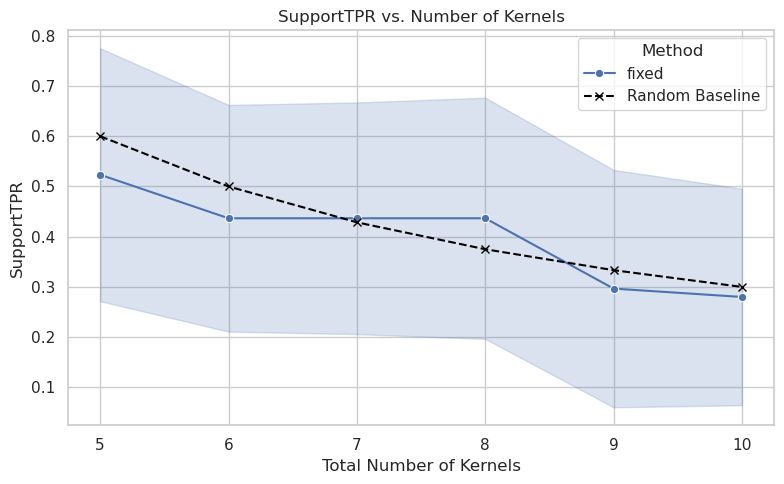

/tmp/ipykernel_3258275/4066840040.py:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


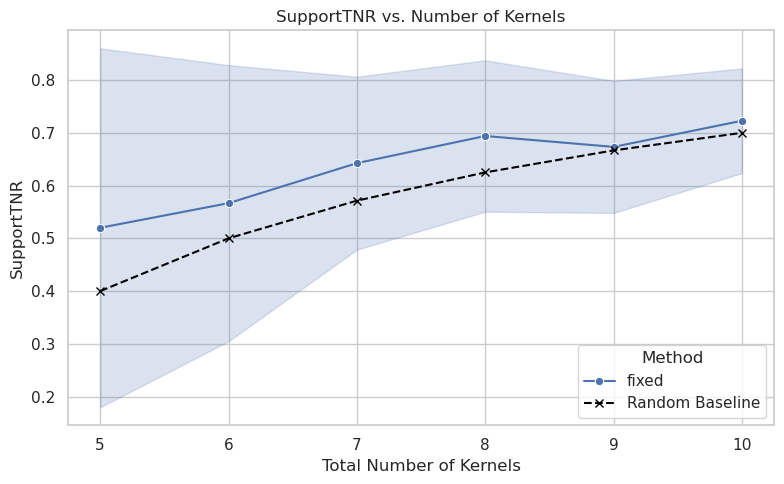

/tmp/ipykernel_3258275/4066840040.py:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


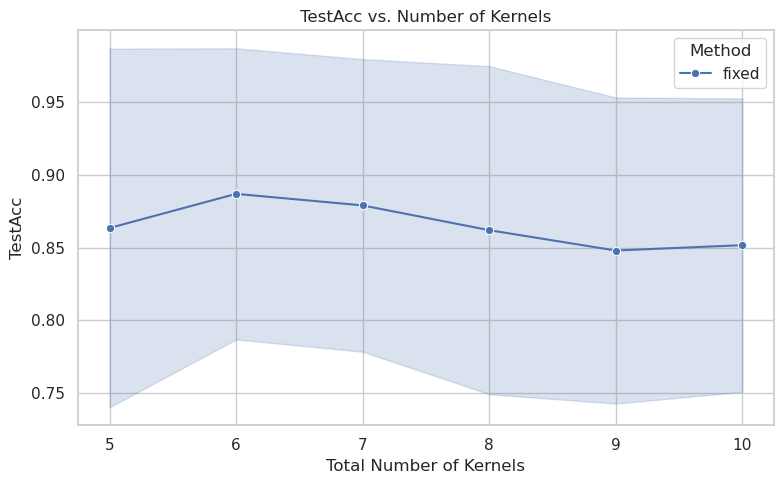

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load your CSV
df = pd.read_csv("./scripts/run_synthetic_experiments_results_20255523_125514.csv")

# Ensure proper types
df['TrainSize'] = df['TrainSize'].astype(int)
df['TotalKernels'] = df['TotalKernels'].astype(int)

# Separate experiment type
df_vary_k = df[df['ExpType'] == 'vary_k']

# === Baseline expectations for random selection (assume you guess k = 3 and true = 3) ===
def compute_random_baseline(T=3):
    rows = []
    for R in sorted(df_vary_k['TotalKernels'].unique()):
        k = T  # assume the guess is always of size T
        tp = k * T / R
        fn = T - tp
        fp = k - tp
        tn = (R - T) * (R - k) / R

        support_acc = (tp + tn) / R
        tpr = tp / T
        tnr = tn / (R - T) if R > T else 0

        rows.append({
            'TotalKernels': R,
            'SupportAcc': support_acc,
            'SupportTPR': tpr,
            'SupportTNR': tnr,
        })
    return pd.DataFrame(rows)

baseline_df = compute_random_baseline()

# === Plot metrics with baseline ===
sns.set(style="whitegrid")
metrics = ['SupportAcc', 'SupportTPR', 'SupportTNR', 'TestAcc']

for metric in metrics:
    plt.figure(figsize=(8, 5))
    
    # Lineplot for actual results
    sns.lineplot(
        data=df_vary_k,
        x='TotalKernels',
        y=metric,
        hue='Method',
        estimator='mean',
        ci='sd',
        marker='o'
    )
    
    # Overlay dashed line for random selection baseline
    if metric in baseline_df.columns:
        plt.plot(
            baseline_df['TotalKernels'],
            baseline_df[metric],
            color='black',
            linestyle='--',
            marker='x',
            label='Random Baseline'
        )

    plt.title(f'{metric} vs. Number of Kernels')
    plt.ylabel(metric)
    plt.xlabel('Total Number of Kernels')
    plt.legend(title='Method', loc='best')
    plt.tight_layout()
    plt.show()


: 

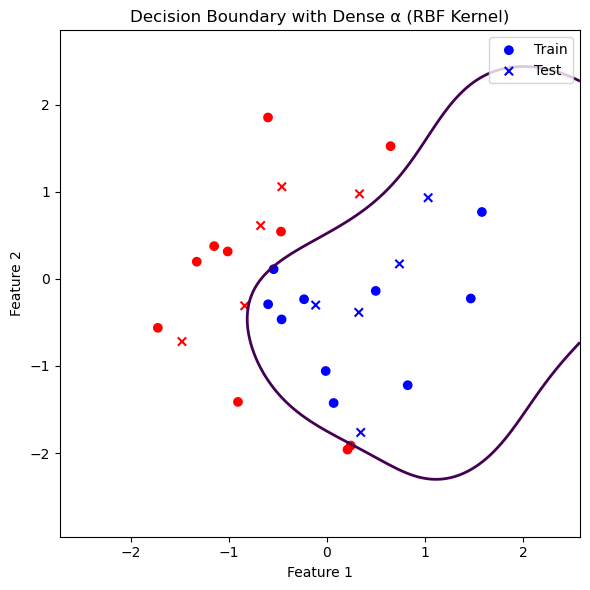

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def synthetic_dataset_rbf_dense(
    n_train=20, n_test=10, dim=2,
    beta_true=0.5, gamma=0.5,
    noise_rate=0.0, random_state=42
):
    """
    Generate synthetic 2D data with an RBF kernel and dense alpha coefficients.
    Returns training/test split, full data matrix, alpha, and bias.
    """
    rng = np.random.RandomState(random_state)
    N = n_train + n_test
    
    # 1. Inputs
    X_all = rng.randn(N, dim)
    X_train = X_all[:n_train].copy()
    X_test = X_all[n_train:].copy()
    
    # 2. RBF Gram matrix
    diff = X_all[:, None, :] - X_all[None, :, :]
    dist2 = np.sum(diff**2, axis=2)
    K = np.exp(-gamma * dist2)
    Kc = beta_true * K
    
    # 3. Dense alpha and bias
    alpha = rng.randn(N)
    b = rng.randn()
    
    # 4. Latent scores & labels
    f = Kc @ alpha + b
    y_all = np.where(f >= 0, 1, -1)
    
    # 5. Optional noise (0 here)
    if noise_rate > 0:
        n_flip = int(np.round(noise_rate * n_train))
        flip_idx = rng.permutation(n_train)[:n_flip]
        y_all[flip_idx] *= -1
    
    # 6. Split
    y_train = y_all[:n_train].copy()
    y_test = y_all[n_train:].copy()
    
    return X_train, y_train, X_test, y_test, X_all, alpha, b

# Generate data with dense alpha
X_train, y_train, X_test, y_test, X_all, alpha, b = synthetic_dataset_rbf_dense()

# Prepare grid for decision boundary
margin = 1.0
x_min, x_max = X_all[:, 0].min() - margin, X_all[:, 0].max() + margin
y_min, y_max = X_all[:, 1].min() - margin, X_all[:, 1].max() + margin
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Kernel eval on grid
diff_grid = grid[:, None, :] - X_all[None, :, :]
dist2_grid = np.sum(diff_grid**2, axis=2)
K_grid = 0.5 * np.exp(-0.5 * dist2_grid)  # beta_true=0.5, gamma=0.5
f_grid = K_grid @ alpha + b
Z = f_grid.reshape(xx.shape)

# Plot
plt.figure(figsize=(6, 6))
# decision boundary (f=0)
plt.contour(xx, yy, Z, levels=[0], linewidths=2)
# scatter points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', marker='o', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', marker='x', label='Test')
plt.legend()
plt.title('Decision Boundary with Dense α (RBF Kernel)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()


In [4]:
# import numpy as np
# import matplotlib.pyplot as plt

# def synthetic_dataset_rbf_sparse(
#     n_train=20, n_test=10, dim=2,
#     beta_true=0.5, gamma=1.0,
#     alpha_sparsity=0.8,  # fraction of zeros in alpha
#     noise_rate=0.1, random_state=42
# ):
#     """
#     Generate synthetic 2D data with an RBF kernel and sparse alpha coefficients.
#     """
#     rng = np.random.RandomState(random_state)
#     N = n_train + n_test
    
#     # 1. Inputs
#     X_all = rng.randn(N, dim)
#     X_train = X_all[:n_train].copy()
#     X_test = X_all[n_train:].copy()
    
#     # 2. RBF Gram matrix
#     diff = X_all[:, None, :] - X_all[None, :, :]
#     dist2 = np.sum(diff**2, axis=2)
#     K = np.exp(-gamma * dist2)
#     Kc = beta_true * K
    
#     # 3. Sparse alpha
#     alpha = np.zeros(N)
#     n_nonzero = int(np.round((1 - alpha_sparsity) * N))
#     nonzero_idx = rng.choice(N, n_nonzero, replace=False)
#     alpha[nonzero_idx] = rng.randn(n_nonzero)
    
#     b = rng.randn()
    
#     # 4. Latent scores & labels
#     f = Kc @ alpha + b
#     y_all = np.where(f >= 0, 1, -1)
    
#     # 5. Add noise to training labels
#     n_flip = int(np.round(noise_rate * n_train))
#     flip_idx = rng.permutation(n_train)[:n_flip]
#     y_all[flip_idx] *= -1
    
#     # 6. Split
#     y_train = y_all[:n_train].copy()
#     y_test = y_all[n_train:].copy()
    
#     return X_train, y_train, X_test, y_test, alpha

# # Generate and plot
# X_train, y_train, X_test, y_test, alpha = synthetic_dataset_rbf_sparse(
#     alpha_sparsity=0.8, gamma=0.5
# )

# plt.figure(figsize=(6, 6))
# plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', marker='o', label='Train')
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', label='Test')
# plt.legend()
# plt.title('Synthetic MKL Data with Sparse α (RBF Kernel)')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.tight_layout()
# plt.show()

# # Print sparsity info
# print(f"α non-zero entries: {np.count_nonzero(alpha)} / {alpha.size}")


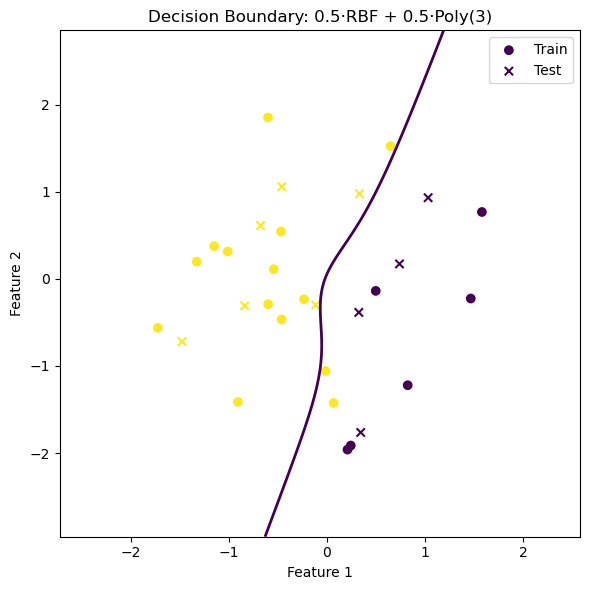

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def synthetic_dataset_mix(
    n_train=20, n_test=10, dim=2,
    beta_rbf=0.5, beta_poly=0.5,
    gamma=0.5, degree=3,
    noise_rate=0.1, random_state=42
):
    """
    Generate synthetic 2D data with a mixture of RBF and polynomial kernels.
    """
    rng = np.random.RandomState(random_state)
    N = n_train + n_test

    # 1. Generate inputs and split
    X_all = rng.randn(N, dim)
    X_train = X_all[:n_train].copy()
    X_test = X_all[n_train:].copy()

    # 2. Compute Gram matrices
    # RBF
    diff = X_all[:, None, :] - X_all[None, :, :]
    dist2 = np.sum(diff**2, axis=2)
    K_rbf = np.exp(-gamma * dist2)
    # Polynomial
    K_poly = (X_all @ X_all.T + 1)**degree
    # Combined
    K = beta_rbf * K_rbf + beta_poly * K_poly

    # 3. Draw dense alpha and bias
    alpha = rng.randn(N)
    b = rng.randn()

    # 4. Latent scores and labels
    f = K @ alpha + b
    y_all = np.where(f >= 0, 1, -1)

    # 5. Add noise to training labels
    n_flip = int(np.round(noise_rate * n_train))
    flip_idx = rng.permutation(n_train)[:n_flip]
    y_all[flip_idx] *= -1

    # 6. Split outputs
    y_train = y_all[:n_train].copy()
    y_test = y_all[n_train:].copy()

    return X_train, y_train, X_test, y_test, X_all, alpha, b

# Generate data
X_train, y_train, X_test, y_test, X_all, alpha, b = synthetic_dataset_mix()

# Create grid for plotting decision boundary
margin = 1.0
x_min, x_max = X_all[:,0].min() - margin, X_all[:,0].max() + margin
y_min, y_max = X_all[:,1].min() - margin, X_all[:,1].max() + margin
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute mixed kernel on grid vs all points
diff_g = grid[:, None, :] - X_all[None, :, :]
dist2_g = np.sum(diff_g**2, axis=2)
K_rbf_g = np.exp(-0.5 * dist2_g)
K_poly_g = (grid @ X_all.T + 1)**3
K_grid = 0.5 * K_rbf_g + 0.5 * K_poly_g

# Decision function values on grid
f_grid = K_grid @ alpha + b
Z = f_grid.reshape(xx.shape)

# Plot boundary and points
plt.figure(figsize=(6,6))
plt.contour(xx, yy, Z, levels=[0], linewidths=2)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, marker='o', label='Train')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='x', label='Test')
plt.legend()
plt.title('Decision Boundary: 0.5·RBF + 0.5·Poly(3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()


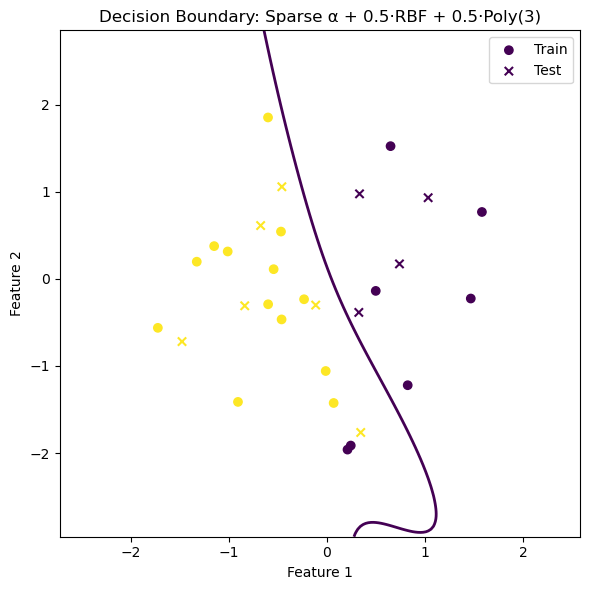

α non-zero entries: 6 / 30


In [16]:
import numpy as np
import matplotlib.pyplot as plt

def synthetic_dataset_mix_sparse(
    n_train=20, n_test=10, dim=2,
    beta_rbf=0.5, beta_poly=0.5,
    gamma=0.5, degree=5,
    alpha_sparsity=0.8,  # fraction of zeros in alpha
    noise_rate=0.1, random_state=42
):
    """
    Generate synthetic 2D data with a mixture of RBF and polynomial kernels
    and a sparse alpha vector.
    """
    rng = np.random.RandomState(random_state)
    N = n_train + n_test

    # 1. Generate inputs and split
    X_all = rng.randn(N, dim)
    X_train = X_all[:n_train].copy()
    X_test = X_all[n_train:].copy()

    # 2. Compute Gram matrices
    # RBF
    diff = X_all[:, None, :] - X_all[None, :, :]
    dist2 = np.sum(diff**2, axis=2)
    K_rbf = np.exp(-gamma * dist2)
    # Polynomial
    K_poly = (X_all @ X_all.T + 1)**degree
    # Combined
    K = beta_rbf * K_rbf + beta_poly * K_poly

    # 3. Draw sparse alpha and bias
    alpha = np.zeros(N)
    n_nonzero = int(np.round((1 - alpha_sparsity) * N))
    nonzero_idx = rng.choice(N, n_nonzero, replace=False)
    alpha[nonzero_idx] = rng.randn(n_nonzero)
    b = rng.randn()

    # 4. Latent scores and labels
    f = K @ alpha + b
    y_all = np.where(f >= 0, 1, -1)

    # 5. Add noise to training labels
    # n_flip = int(np.round(noise_rate * n_train))
    # flip_idx = rng.permutation(n_train)[:n_flip]
    # y_all[flip_idx] *= -1

    # 6. Split outputs
    y_train = y_all[:n_train].copy()
    y_test = y_all[n_train:].copy()

    return X_train, y_train, X_test, y_test, X_all, alpha, b

# Generate data with sparse alpha
X_train, y_train, X_test, y_test, X_all, alpha, b = synthetic_dataset_mix_sparse(alpha_sparsity=0.8)

# Create grid for plotting decision boundary
margin = 1.0
x_min, x_max = X_all[:,0].min() - margin, X_all[:,0].max() + margin
y_min, y_max = X_all[:,1].min() - margin, X_all[:,1].max() + margin
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute mixed kernel on grid vs all points
diff_g = grid[:, None, :] - X_all[None, :, :]
dist2_g = np.sum(diff_g**2, axis=2)
K_rbf_g = np.exp(-0.5 * dist2_g)
K_poly_g = (grid @ X_all.T + 1)**3
K_grid = 0.5 * K_rbf_g + 0.5 * K_poly_g

# Decision function values on grid
f_grid = K_grid @ alpha + b
Z = f_grid.reshape(xx.shape)

# Plot boundary and points
plt.figure(figsize=(6,6))
plt.contour(xx, yy, Z, levels=[0], linewidths=2)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, marker='o', label='Train')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='x', label='Test')
plt.legend()
plt.title('Decision Boundary: Sparse α + 0.5·RBF + 0.5·Poly(3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

# Print sparsity info
print(f"α non-zero entries: {np.count_nonzero(alpha)} / {alpha.size}")


In [11]:
# Cell 1: imports, kernel specs, and helper function
import numpy as np
import matplotlib.pyplot as plt

# define the same kernel specs used in simulation
BASE_KERNEL_SPECS = [
    {"type":"rbf",        "params":{"gamma":0.5}},
    {"type":"rbf",        "params":{"gamma":1.0}},
    {"type":"polynomial", "params":{"degree":2, "c":1.0}},
    {"type":"polynomial", "params":{"degree":3, "c":0.0}},
]

def mixed_kernel_matrix(X1, X2, specs, betas):
    """
    Compute combined Gram Kc(x_i, x_j) = sum_k betas[k] * K_spec[k](X1,X2).
    We zip specs & betas so we only iterate as many times as there are betas.
    """
    N1, N2 = X1.shape[0], X2.shape[0]
    Kc = np.zeros((N1, N2))
    for spec, β in zip(specs, betas):
        if β == 0:
            continue
        if spec["type"] == "rbf":
            γ = spec["params"]["gamma"]
            diff = X1[:, None, :] - X2[None, :, :]
            D2 = np.sum(diff**2, axis=2)
            K = np.exp(-γ * D2)
        elif spec["type"] == "polynomial":
            d = spec["params"]["degree"]
            c = spec["params"].get("c", 1.0)
            K = (X1 @ X2.T + c) ** d
        else:
            raise ValueError(f"Unknown kernel type {spec['type']}")
        Kc += β * K
    return Kc

# specify the path to your replicate file
replicate_path = "./scripts/mkl_sim_results/rep_vary_k_p3_r01.npz"

# Cell 2: load data
data = np.load(replicate_path)
X_all      = data["X_all"]       
alpha_true = data["alpha_true"]  
beta_true  = data["beta_true"]   
alpha_est  = data["alpha_est"]   
beta_est   = data["beta_est"]    

# Cell 3: compute decision function values on a grid
margin = 1.0
x0, x1 = X_all[:,0].min()-margin, X_all[:,0].max()+margin
y0, y1 = X_all[:,1].min()-margin, X_all[:,1].max()+margin
xx, yy = np.meshgrid(np.linspace(x0, x1, 300),
                     np.linspace(y0, y1, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

# only use as many specs as you have betas
used_specs = BASE_KERNEL_SPECS[: len(beta_true)]

Kg_true = mixed_kernel_matrix(grid, X_all, used_specs, beta_true)

In [2]:
# Cell 1: Imports, kernel specs, and helper function
import numpy as np
import matplotlib.pyplot as plt

# define the same kernel specs used in simulation
BASE_KERNEL_SPECS = [
    {"type":"rbf",        "params":{"gamma":0.5}},
    {"type":"rbf",        "params":{"gamma":1.0}},
    {"type":"polynomial", "params":{"degree":2, "c":1.0}},
    {"type":"polynomial", "params":{"degree":3, "c":0.0}},
]

def mixed_kernel_matrix(X1, X2, specs, betas):
    """
    Compute combined Gram Kc(x_i, x_j) = sum_k betas[k] * K_spec[k](X1,X2).
    """
    N1, N2 = X1.shape[0], X2.shape[0]
    Kc = np.zeros((N1, N2))
    for spec, β in zip(specs, betas):
        if β == 0:
            continue
        if spec["type"] == "rbf":
            γ = spec["params"]["gamma"]
            diff = X1[:, None, :] - X2[None, :, :]
            D2 = np.sum(diff**2, axis=2)
            K = np.exp(-γ * D2)
        else:  # polynomial
            d = spec["params"]["degree"]
            c = spec["params"].get("c", 1.0)
            K = (X1 @ X2.T + c) ** d
        Kc += β * K
    return Kc

# Cell 2: Load data
replicate_path = "./scripts/mkl_sim_results/rep_vary_k_p5_r01.npz"
data = np.load(replicate_path)
X_all      = data["X_all"]       # shape (N_total, 2)
alpha_true = data["alpha_true"]  # shape (N_total,)
beta_true  = data["beta_true"]   # length K
alpha_est  = data["alpha_est"]   # shape (n_train,)
beta_est   = data["beta_est"]    # length K

# derive training subset and matching specs
n_train   = alpha_est.shape[0]
X_tr      = X_all[:n_train]
used_specs = BASE_KERNEL_SPECS[:len(beta_true)]

# Cell 3: Compute grid & decision surfaces
margin = 1.0
x0, x1 = X_all[:,0].min() - margin, X_all[:,0].max() + margin
y0, y1 = X_all[:,1].min() - margin, X_all[:,1].max() + margin
xx, yy = np.meshgrid(np.linspace(x0, x1, 300),
                     np.linspace(y0, y1, 300))
grid = np.c_[xx.ravel(), yy.ravel()]


KeyError: 'X_all is not a file in the archive'

In [100]:
data.keys()

KeysView(NpzFile './scripts/mkl_sim_results/rep_vary_k_p5_r05.npz' with keys: b_true, alpha_est, beta_est, beta_true, b_est...)

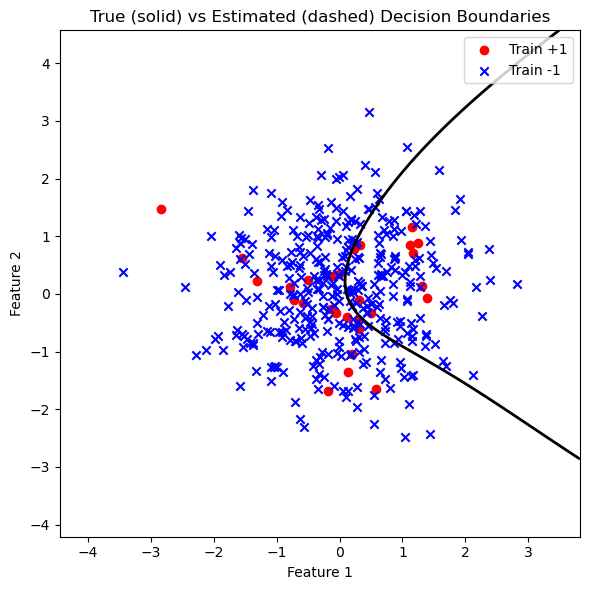

In [11]:
# Cell 1: Imports, kernel specs, and helper functions
import numpy as np
import matplotlib.pyplot as plt

# define the same kernel specs used in simulation
BASE_KERNEL_SPECS = [
    # Polynomial kernels
    {"type": "polynomial", "params": {"degree": 2, "c": 0.0}},
    {"type": "polynomial", "params": {"degree": 3, "c": 1.0}},
    {"type": "polynomial", "params": {"degree": 4, "c": 5.0}},
    {"type": "polynomial", "params": {"degree": 5, "c": 10.0}},
    {"type": "polynomial", "params": {"degree": 5, "c": 20.0}},


    # RBF kernels
    {"type": "rbf", "params": {"gamma": 0.01}},
    {"type": "rbf", "params": {"gamma": 0.1}},
    {"type": "rbf", "params": {"gamma": 1.0}},
    {"type": "rbf", "params": {"gamma": 10.0}},
    {"type": "rbf", "params": {"gamma": 20.0}},

]


def mixed_kernel_matrix(X1, X2, specs, betas):
    """
    Compute combined Gram Kc(x_i, x_j) = sum_k betas[k] * K_spec[k](X1,X2).
    """
    N1, N2 = X1.shape[0], X2.shape[0]
    Kc = np.zeros((N1, N2))
    for spec, β in zip(specs, betas):
        if β == 0:
            continue
        if spec["type"] == "rbf":
            γ = spec["params"]["gamma"]
            diff = X1[:, None, :] - X2[None, :, :]
            D2 = np.sum(diff**2, axis=2)
            K = np.exp(-γ * D2)
        else:  # polynomial
            d = spec["params"]["degree"]
            c = spec["params"].get("c", 1.0)
            K = (X1 @ X2.T + c) ** d
        Kc += β * K
    return Kc

# Cell 2: Load .npz data
replicate_path = "./scripts/mkl_sim_results/rep_vary_k_p5_r02.npz"
data = np.load(replicate_path)
X_all      = data["X_train"]    # use X_train for both true and estimated grid
X_tr       = data["X_train"]
X_te       = data["X_test"]
alpha_true = data["alpha_true"]
b_true     = data["b_true"]
beta_true  = data["beta_true"]
alpha_est  = data["alpha_est"]
b_est      = data["b_est"]
beta_est   = data["beta_est"]
y_tr       = data["y_train"]
# derive full X for true
X_full = np.vstack([X_tr, X_te])

# only use specs matching β length
used_specs = BASE_KERNEL_SPECS[:len(beta_true)]

# Cell 3: Build grid and compute decision surfaces
margin = 1.0
x0, x1 = X_full[:,0].min() - margin, X_full[:,0].max() + margin
y0, y1 = X_full[:,1].min() - margin, X_full[:,1].max() + margin
xx, yy = np.meshgrid(
    np.linspace(x0, x1, 300),
    np.linspace(y0, y1, 300)
)
grid = np.c_[xx.ravel(), yy.ravel()]

# True decision surface
Kg_true = mixed_kernel_matrix(grid, X_full, used_specs, beta_true)
f_true  = Kg_true @ alpha_true + b_true
Z_true  = f_true.reshape(xx.shape)

# Estimated decision surface
Kg_est  = mixed_kernel_matrix(grid, X_tr, used_specs, beta_est)
f_est   = Kg_est @ alpha_est + b_est
Z_est   = f_est.reshape(xx.shape)

# Cell 4: Plot boundaries and training points
plt.figure(figsize=(6,6))
plt.contour(xx, yy, Z_true, levels=[0], linewidths=2, linestyles="solid", colors="black")
plt.contour(xx, yy, Z_est,  levels=[0], linewidths=2, linestyles="dashed", colors="black")
plt.scatter(X_tr[y_tr==1,0],  X_tr[y_tr==1,1],  c='red', marker='o', label='Train +1')
plt.scatter(X_tr[y_tr==-1,0], X_tr[y_tr==-1,1], c='blue',marker='x', label='Train -1')
plt.title("True (solid) vs Estimated (dashed) Decision Boundaries")
plt.xlabel("Feature 1"); plt.ylabel("Feature 2")
plt.legend(); plt.tight_layout(); plt.show()


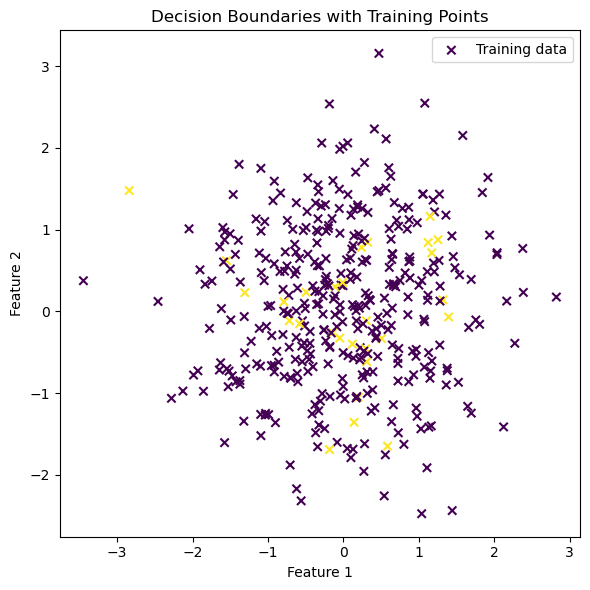

In [9]:
replicate_path = "./scripts/mkl_sim_results/rep_vary_k_p5_r02.npz"
data = np.load(replicate_path)
X_tr = data["X_train"]  # shape (n_train, 2)
y_tr = data["y_train"]
X_te = data["X_test"]   # shape (n_test, 2)
# alpha_true = data["alpha_true"]  # shape (N_total,)
# beta_true  = data["beta_true"]   # length K
# alpha_est  = data["alpha_est"]   # shape (n_train,)
# beta_est   = data["beta_est"]    # length K


# Cell 4: Plot boundaries and only training points
plt.figure(figsize=(6,6))

# true boundary (solid)
# plt.contour(xx, yy, Z_true, levels=[0], linewidths=2, linestyles="solid", colors="black")
# estimated boundary (dashed)
# plt.contour(xx, yy, Z_est,  levels=[0], linewidths=2, linestyles="dashed", colors="black")

# scatter only the training points
plt.scatter(X_tr[:, 0], X_tr[:, 1], c=y_tr, marker='x', label='Training data')

plt.title("Decision Boundaries with Training Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.tight_layout()
plt.show()


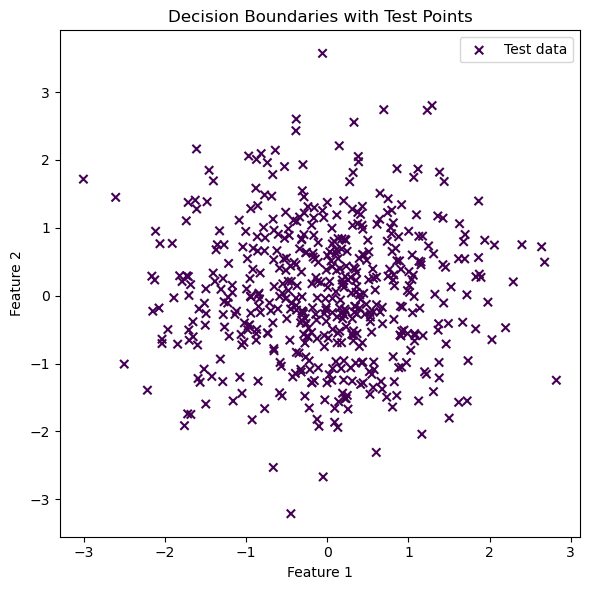

In [12]:
replicate_path = "./scripts/mkl_sim_results/rep_vary_k_p5_r02.npz"
data = np.load(replicate_path)
X_tr = data["X_train"]  # shape (n_train, 2)
X_te = data["X_test"]   # shape (n_test, 2)
# alpha_true = data["alpha_true"]  # shape (N_total,)
# beta_true  = data["beta_true"]   # length K
# alpha_est  = data["alpha_est"]   # shape (n_train,)
# beta_est   = data["beta_est"]    # length K
y_tr = data["y_train"]
y_te = data["y_test"]

# Cell 4: Plot boundaries and only training points
plt.figure(figsize=(6,6))

# true boundary (solid)
# plt.contour(xx, yy, Z_true, levels=[0], linewidths=2, linestyles="solid", colors="black")
# estimated boundary (dashed)
# plt.contour(xx, yy, Z_est,  levels=[0], linewidths=2, linestyles="dashed", colors="black")

# scatter only the training points
plt.scatter(X_te[:, 0], X_te[:, 1], c=y_te, marker='x', label='Test data')

plt.title("Decision Boundaries with Test Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.tight_layout()
plt.show()


In [16]:
import pandas as pd

pd.DataFrame(y_te).value_counts()

0   
-1.0    500
Name: count, dtype: int64